#Importing libraries


In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Defining Question

Which individuals are most likely to get financial access?

#Success Metric

#Context of Problem

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.




# Data Relevance

#Loading and reading dataset

In [0]:
#loading the dataset  and displaying the head and tail
url='http://bit.ly/FinancialDataset'
fin_data=pd.read_csv(url)
fin_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#Exploratory Data Analysis

In [0]:
#Checking the shape of the dataset
fin_data.shape

(23524, 13)

In [0]:
#checking the datatypes in the dataset
fin_data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [0]:
#Checking dataset information on non-null values
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
#Checking the description of the data
fin_data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


#Tidying

In [0]:
#Checking for null values
fin_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
#replacing missing values in columns with categorical data with mode 
fin_data['country']=fin_data['country'].fillna('Rwanda')

In [0]:
print(
    fin_data['Has a Bank account'].mode(),
    fin_data['Cell Phone Access'].mode(),
    fin_data['Type of Location'].mode(),
    fin_data['Type of Job'].mode(),
    fin_data['Level of Educuation'].mode(),
    fin_data['marital_status'].mode(),
    fin_data['The relathip with head'].mode(),
    fin_data['gender_of_respondent'].mode(),
    fin_data['Respondent Age'].median(),
    fin_data['household_size'].median(),


)

0    No
dtype: object 0    Yes
dtype: object 0    Rural
dtype: object 0    Self employed
dtype: object 0    Primary education
dtype: object 0    Married/Living together
dtype: object 0    Head of Household
dtype: object 0    Female
dtype: object 35.0 3.0


In [0]:
   #Filling in the missing values 
    fin_data['Has a Bank account']=fin_data['Has a Bank account'].fillna('No')
    fin_data['Cell Phone Access']=fin_data['Cell Phone Access'].fillna('Yes')
    fin_data['Type of Location']=fin_data['Type of Location'].fillna('Rural')
    fin_data['Type of Job']=fin_data['Type of Job'].fillna('Self employed')
    fin_data['Level of Educuation']=fin_data['Level of Educuation'].fillna('Primary education')
    fin_data['marital_status']=fin_data['marital_status'].fillna('Married/Living together')
    fin_data['The relathip with head']=fin_data['The relathip with head'].fillna('Head of Household')
    fin_data['gender_of_respondent']=fin_data['gender_of_respondent'].fillna('Female')
    fin_data['Respondent Age']=fin_data['Respondent Age'].fillna(35.0)
    fin_data['household_size']=fin_data['household_size'].fillna(3.0)


In [0]:
#Confirming there are no missing values
fin_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

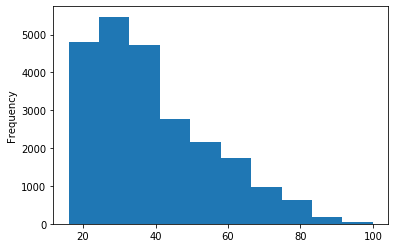

In [0]:
#Checking for outliers and anomalies through a histogram
fin_data['Respondent Age'].plot(kind='hist')
plt.show()


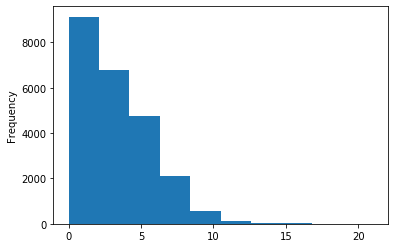

In [0]:
#Checking for outliers and anomalies through a histogram
fin_data['household_size'].plot(kind='hist')
plt.show()

#Changing column names



In [0]:
# Changing column names to make it easy to work with them
fin_data.columns=map(str.lower, fin_data.columns)

columns=['country', 'year', 'unique_id', 'has_bank_account','location','phone_access', 'household_size', 'age', 'gender','relationship_with_head', 'marital_status', 'education_level', 'job']
fin_data.columns=columns
fin_data.head()

,country,year,unique_id,has_bank_account,location,phone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#Univariate Analysis

In [0]:
#Finding the count of values in the location column
fin_data['location'].value_counts()



Rural    14353
Urban     9171
Name: location, dtype: int64

In [0]:
#extracting the values and indices from the location column
print(
fin_data['location'].value_counts().index,
fin_data['location'].value_counts().values
)


Index(['Rural', 'Urban'], dtype='object') [14353  9171]


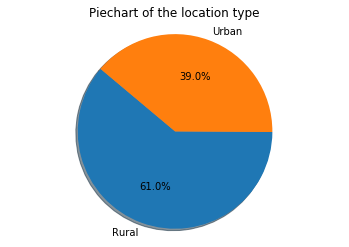

In [0]:
location=fin_data['location'].value_counts().index
count=fin_data['location'].value_counts().values

plt.pie(count, labels=location, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of the location type')
plt.show()


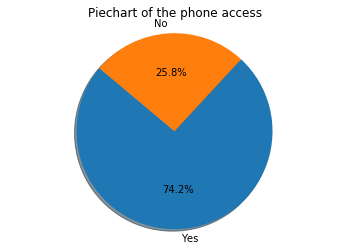

In [0]:
#Finding the count of values in the gender column
fin_data['phone_access'].value_counts()
#Extracting the indices and values from the phone access column
fin_data['phone_access'].value_counts().index
fin_data['phone_access'].value_counts().values

#Ploting a pie chart of the phone access data
label=fin_data['phone_access'].value_counts().index
size=fin_data['phone_access'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of the phone access')
plt.show()


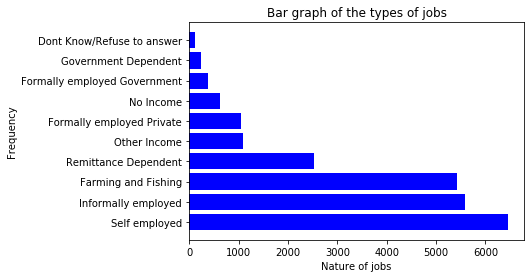

In [0]:


 #Ploting a pie chart of the job column data
label=fin_data['job'].value_counts().index
size=fin_data['job'].value_counts().values




plt.barh(label, size, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Nature of jobs')
plt.title('Bar graph of the types of jobs')
plt.show()


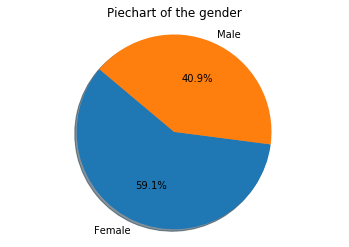

In [0]:
#Finding the count of values in the gender column
fin_data['gender'].value_counts()
#Extracting the indices and values from the gender column
fin_data['gender'].value_counts().index
fin_data['gender'].value_counts().values

#Ploting a pie chart of the gender data
label=fin_data['gender'].value_counts().index
size=fin_data['gender'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of the gender')
plt.show()


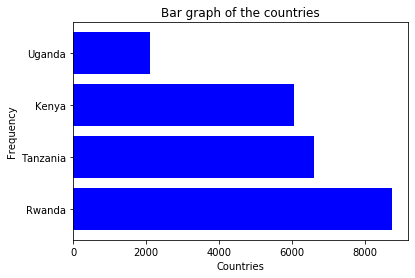

In [0]:

 #Ploting a pie chart of the country column data
label=fin_data['country'].value_counts().index
size=fin_data['country'].value_counts().values




plt.barh(label, size, color='blue' )
plt.ylabel('Frequency')
plt.xlabel('Countries')
plt.title('Bar graph of the countries')
plt.show()

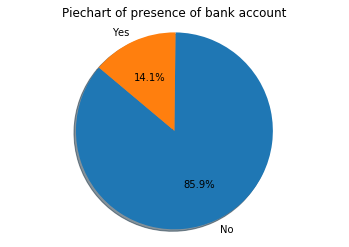

In [0]:
#Determining the count of the data in the country column
fin_data['has_bank_account'].value_counts()
#Extracting the indices and values from the gender column
fin_data['has_bank_account'].value_counts().index
fin_data['has_bank_account'].value_counts().values

#Ploting a pie chart of the gender data
label=fin_data['has_bank_account'].value_counts().index
size=fin_data['has_bank_account'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of presence of bank account')
plt.show()


In [0]:
#Finding the skewness and kurtosis of the age data
print(fin_data['age'].kurt(),
fin_data['age'].skew()
)

0.10624788844116617 0.8432949066687457


In [0]:
#Determining the skewness and kurtosis of the household size
print(fin_data['household_size'].kurt(),
fin_data['household_size'].skew()
)

1.1636269394094754 0.9791150948002473


In [0]:
#Measures of central tendency of the household size data
print(fin_data['household_size'].mode(),
fin_data['household_size'].median(),
fin_data['household_size'].mean()
)



0    2.0
dtype: float64 3.0 3.6810066315252508


In [0]:
#Measures of central tendency of the age data
print(fin_data['age'].mean(),
fin_data['age'].mode(),
fin_data['age'].median()
)

38.79880122428158 0    30.0
dtype: float64 35.0


In [0]:
#The standard deviation of the age data
fin_data['age'].std()

16.50868550530985

In [0]:
#The standard deviation of the household size dataset
fin_data['household_size'].std()

2.2786973429367734

#Bivariate Analysis

In [0]:
#The correlation in the dataset
fin_data.corr()

,year,household_size,age
year,1.000000,-0.049303,-0.019470
household_size,-0.049303,1.000000,-0.119446
age,-0.019470,-0.119446,1.000000


<function matplotlib.pyplot.show>

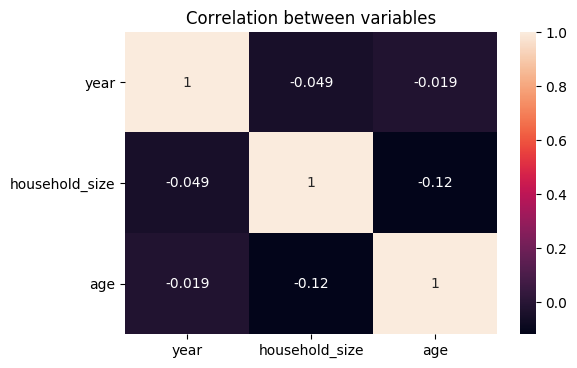

In [0]:
#Checking for correlations between the variables
plt.figure(dpi=100)
cor=fin_data.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.title('Correlation between variables')
plt.show

#Factors affecting financial access



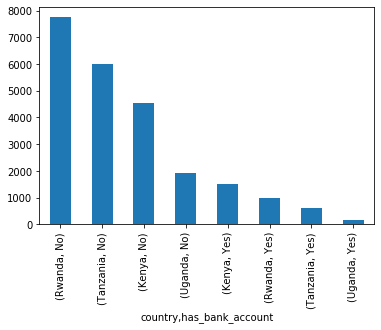

In [0]:
#Checking whether individuals have bank accounts or not in the different countries
fin_data.groupby(['country','has_bank_account'])['has_bank_account'].count().sort_values(ascending=False).plot.bar()

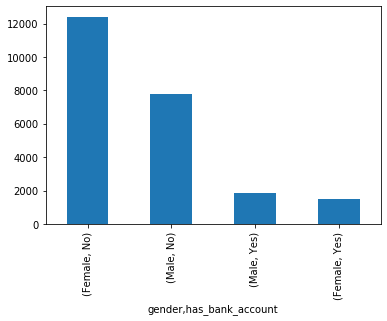

In [0]:
fin_data.groupby(['gender','has_bank_account'])['has_bank_account'].count().sort_values(ascending=False).plot.bar()

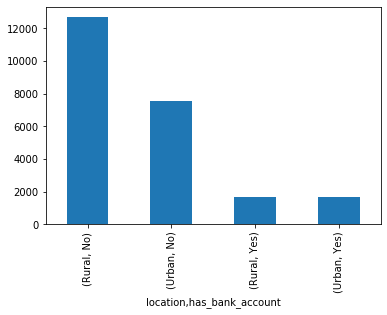

In [0]:
fin_data.groupby(['location','has_bank_account'])['has_bank_account'].count().sort_values(ascending=False).plot.bar()

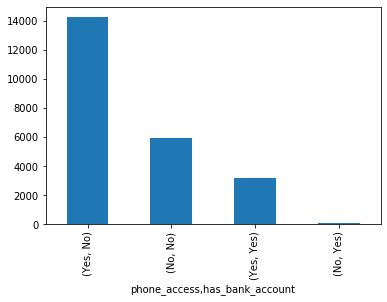

In [0]:
fin_data.groupby(['phone_access','has_bank_account'])['has_bank_account'].count().sort_values(ascending=False).plot.bar()

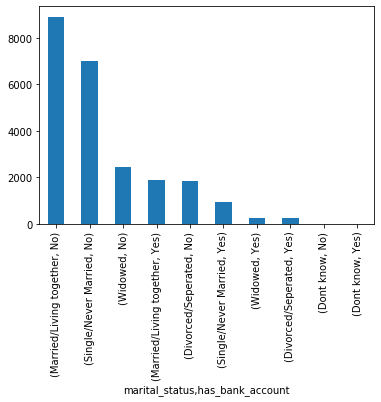

In [0]:
fin_data.groupby(['marital_status','has_bank_account'])['has_bank_account'].count().sort_values(ascending=False).plot.bar()

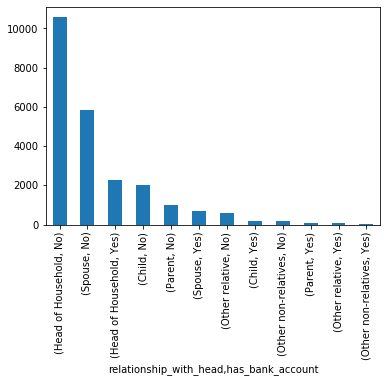

In [0]:
fin_data.groupby(['relationship_with_head','has_bank_account'])['has_bank_account'].count().sort_values(ascending=False).plot.bar()

In [0]:
fin_data['gender'] = fin_data.gender_of_respondent.map({'Female':0, 'Male':1})